In [54]:
import csv

import pandas as pd

mmlu_num_maj_df = pd.read_csv(
    "../data/mmlu_pro_stem_reasoning_score.tsv",
    sep="\t",
    header=0,
    quoting=csv.QUOTE_NONE,
    quotechar="",
    escapechar="\\",
)

In [55]:
print(mmlu_num_maj_df.value_counts("masj_requires_knowledge"))
print(mmlu_num_maj_df.value_counts("masj_requires_reasoning"))
print(mmlu_num_maj_df.value_counts("masj_num_reasoning_steps"))

masj_requires_knowledge
yes    11171
no       220
Name: count, dtype: int64
masj_requires_reasoning
yes    9067
no     2323
Name: count, dtype: int64
masj_num_reasoning_steps
medium    7536
low       2774
high      1078
Name: count, dtype: int64


/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_13958/3458247725.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


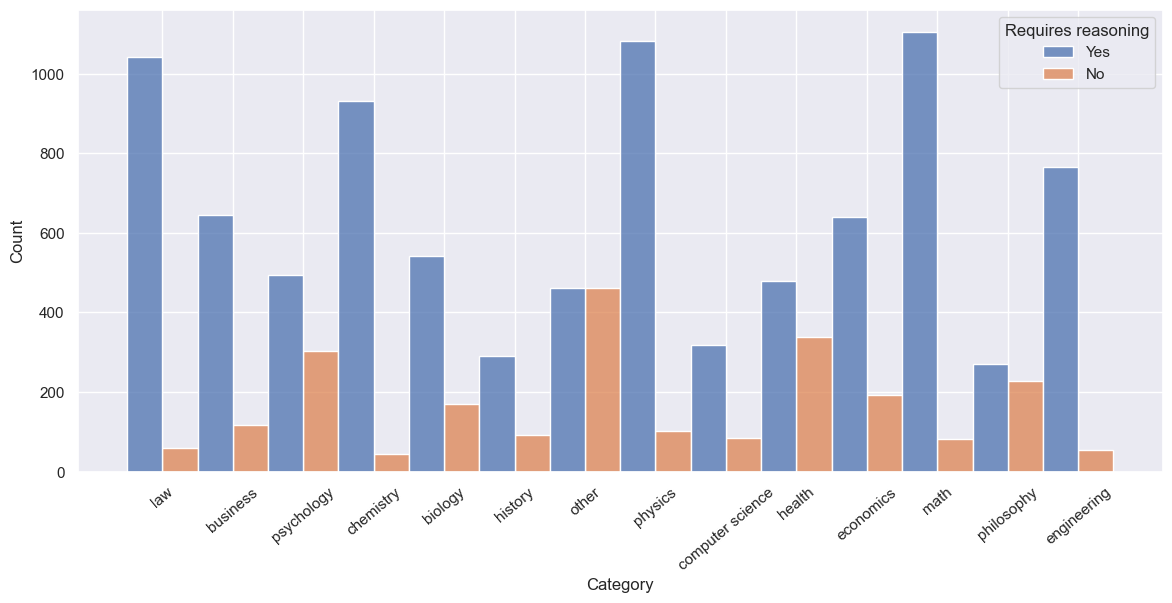

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    # bins=len(mmlu_num_maj_df["category"].unique()),
    hue="masj_requires_reasoning",
    hue_order=["yes", "no"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires reasoning")

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_13958/1724277203.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


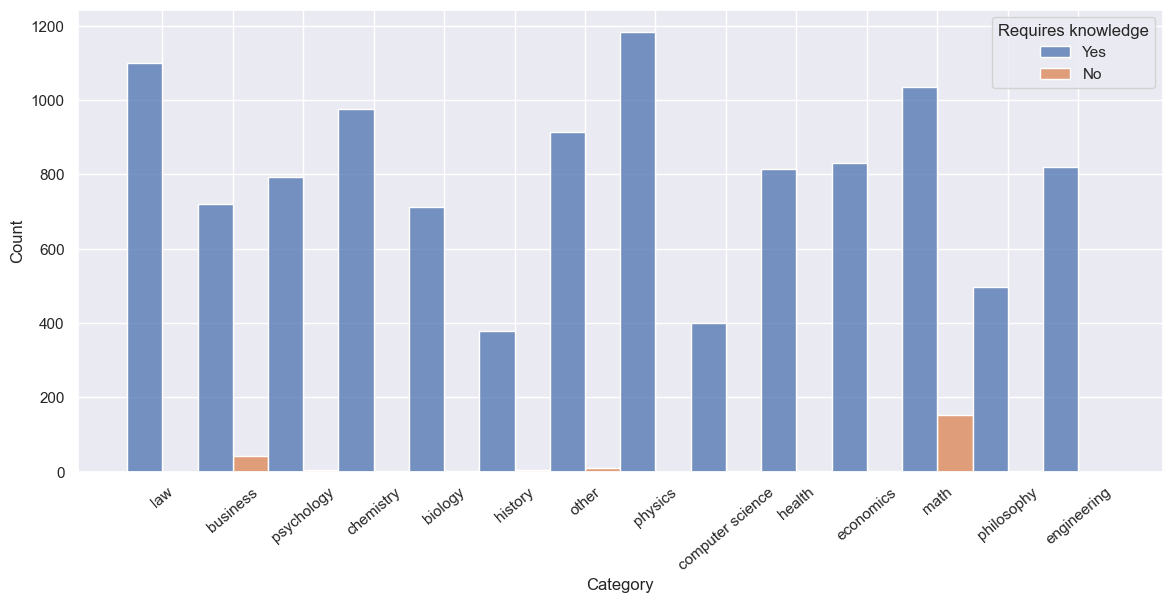

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    hue="masj_requires_knowledge",
    hue_order=["yes", "no"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Yes", "No"], title="Requires knowledge")

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_13958/3176517760.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40)


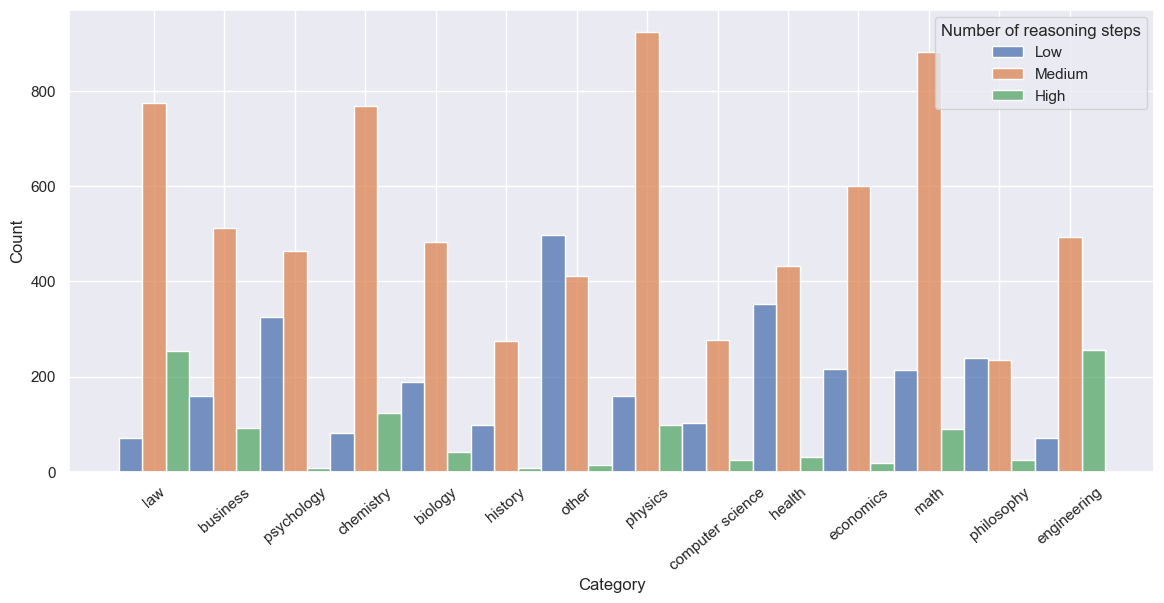

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="category",
    bins=len(mmlu_num_maj_df["category"].unique()),
    hue="masj_num_reasoning_steps",
    hue_order=["low", "medium", "high"],
    multiple="dodge",
)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.legend(handles=ax.get_legend().legend_handles, labels=["Low", "Medium", "High"], title="Number of reasoning steps")